<a href="https://colab.research.google.com/github/TangNgheQuangHuy/TangNgheQuangHuy-20146255-fuzzylogic/blob/main/data_crab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'data_crab.csv'
data = pd.read_csv(url)
data.sample(5)

,sp,sex,index,FL,RW,CL,CW,BD
43,B,M,44,18.8,15.8,42.1,49.0,17.8
33,B,M,34,16.4,13.0,35.7,41.8,15.2
4,B,M,5,9.8,8.0,20.3,23.0,8.2
144,O,M,45,21.6,15.4,45.7,49.7,20.6
127,O,M,28,17.5,12.0,34.4,37.3,15.3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sp      200 non-null    object 
 1   sex     200 non-null    object 
 2   index   200 non-null    int64  
 3   FL      200 non-null    float64
 4   RW      200 non-null    float64
 5   CL      200 non-null    float64
 6   CW      200 non-null    float64
 7   BD      200 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 12.6+ KB


B    100
O    100
Name: sp, dtype: int64


<Axes: xlabel='sp', ylabel='count'>

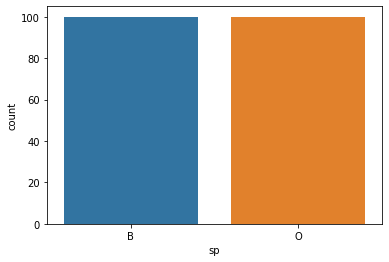

In [ ]:
print(data['sp'].value_counts())
sns.countplot(x='sp',data=data)

11.0    6
12.2    6
13.5    6
11.5    5
13.8    5
       ..
11.7    1
16.1    1
16.9    1
6.9     1
20.2    1
Name: RW, Length: 91, dtype: int64


<Axes: xlabel='RW', ylabel='count'>

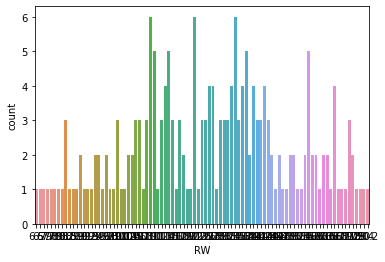

In [ ]:
print(data['RW'].value_counts())
sns.countplot(x='RW',data=data)

34.5    4
31.6    4
32.3    3
31.7    3
30.1    3
       ..
19.6    1
19.2    1
18.5    1
19.3    1
46.2    1
Name: CL, Length: 152, dtype: int64


<Axes: xlabel='CL', ylabel='count'>

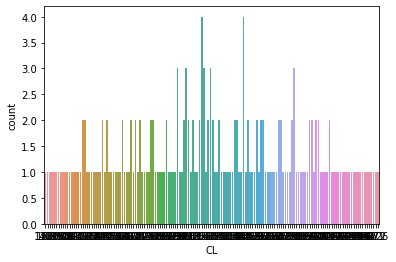

In [ ]:
print(data['CL'].value_counts())
sns.countplot(x='CL',data=data)

13.8    6
14.0    5
14.7    4
17.8    4
13.5    4
       ..
9.0     1
9.2     1
10.8    1
12.8    1
19.8    1
Name: BD, Length: 102, dtype: int64


<Axes: xlabel='BD', ylabel='count'>

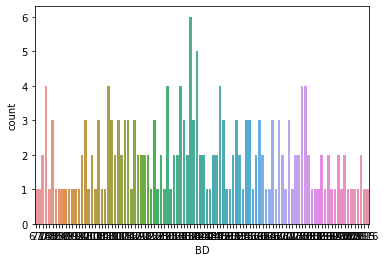

In [ ]:
print(data['BD'].value_counts())
sns.countplot(x='BD',data=data)

<Axes: >

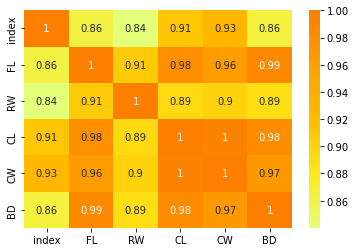

In [ ]:
corr = data.corr()
sns.heatmap(corr,cmap='Wistia',annot=True)

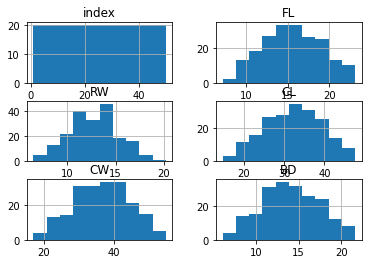

In [3]:
import pandas as pd
url = 'data_crab.csv'
data = pd.read_csv(url)
data.head()
import matplotlib.pyplot as plt
data.hist()
plt.show()

In [4]:
correlation = data.corr()
print(correlation)

          index        FL        RW        CL        CW        BD
index  1.000000  0.862876  0.840040  0.911436  0.928248  0.864459
FL     0.862876  1.000000  0.906988  0.978842  0.964956  0.987627
RW     0.840040  0.906988  1.000000  0.892743  0.900402  0.889205
CL     0.911436  0.978842  0.892743  1.000000  0.995023  0.983204
CW     0.928248  0.964956  0.900402  0.995023  1.000000  0.967812
BD     0.864459  0.987627  0.889205  0.983204  0.967812  1.000000


<Axes: >

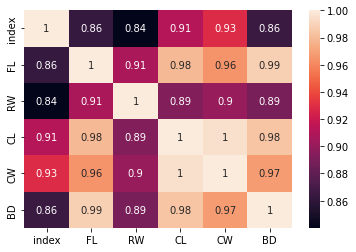

In [5]:
import seaborn as sns
sns.heatmap(correlation,annot=True)

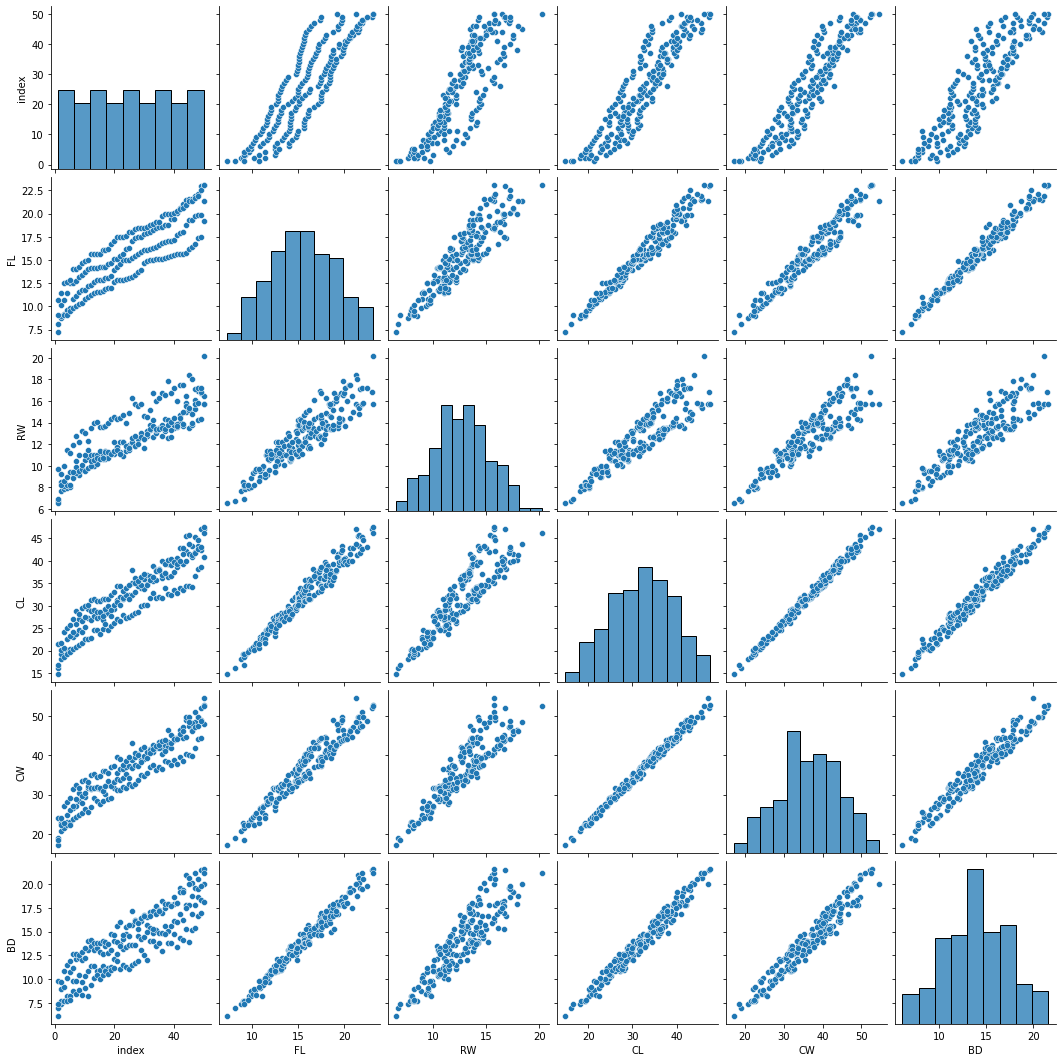

In [7]:
sns.pairplot(data)

In [8]:
from sklearn import linear_model #hoi quy tuyen tinh
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['CW']),
          y = data['RW']) # day. du lieu
print('Hệ số intercept là:', model.intercept_)
print('Hệ số coeficient là:',model.coef_)

Hệ số intercept là: 2.0202128400062858
Hệ số coeficient là: [0.29434119]


In [ ]:
model.score(pd.DataFrame(data['CW']),data['RW'])

0.810723939250849

In [ ]:
y_pred=model.predict(X=pd.DataFrame(data['CW']))

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


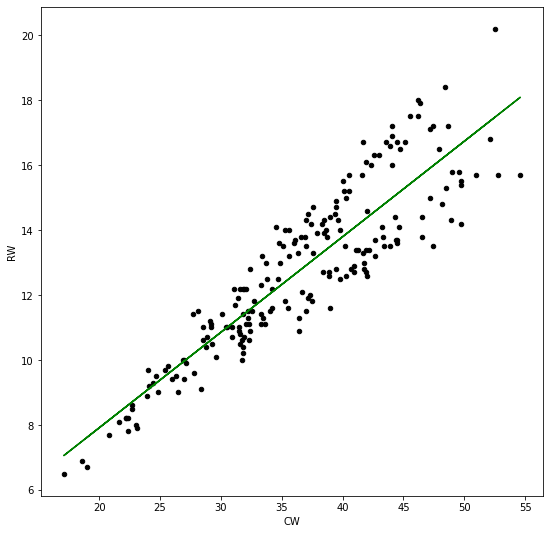

In [ ]:
data.plot(kind='scatter',x='CW',y='RW',figsize=(9,9),color='black')
plt.plot(data['CW'],y_pred, color='green')

In [ ]:
model=linear_model.LinearRegression()
X = pd.DataFrame([data['CW'], data['RW']**2]).T #Chuyển hàng thành cột
model.fit(X, y = data['RW'])
print('Intercept của mô hình:', model.intercept_)
print('Coefficient của mô hình:', model.coef_)
print('Độ chính xác của mô hình:', model.score(X,y=data['RW'] ))

Intercept của mô hình: 5.400576348278214
Coefficient của mô hình: [0.04449413 0.03386088]
Độ chính xác của mô hình: 0.9874657459698997


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


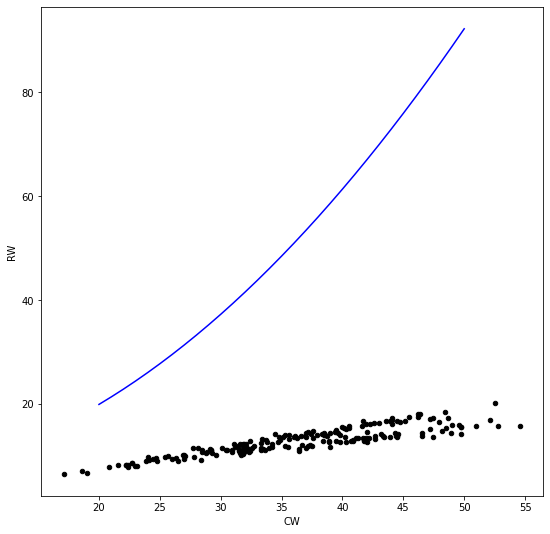

In [ ]:
import numpy as np
range = np.arange(20,51,1)
X_range = pd.DataFrame([range,range**2]).T
y_pred = model.predict(X=X_range)
data.plot(kind='scatter',x='CW',y='RW',figsize=(9,9),color='black')
plt.plot(range,y_pred,color='blue')

Intercept của mô hình: 5.834734046286325
Coefficient của mô hình: [-1.64236157e-07 -3.66428595e-06 -4.38768513e-05 -2.78794387e-04
  4.83376818e-05 -3.20331284e-06  1.09180970e-07 -2.04827365e-09
  2.01713171e-11 -8.17088986e-14]
Độ chính xác của mô hình: 0.8199664027000217


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


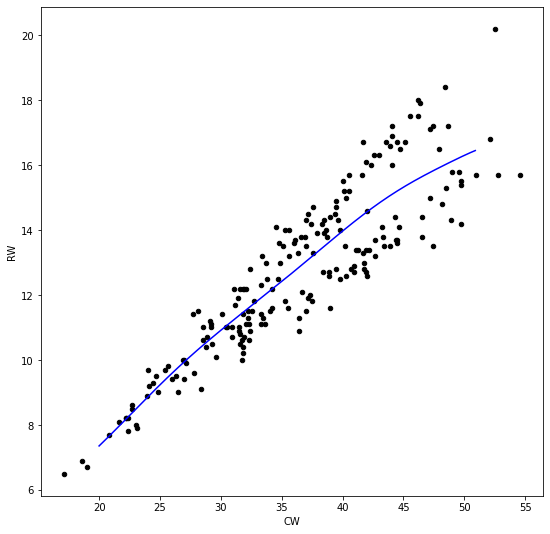

In [ ]:
model=linear_model.LinearRegression()
X = pd.DataFrame([data['CW'], data['CW']**2, data['CW']**3, data['CW']**4,data['CW']**5,data['CW']**6,data['CW']**7,data['CW']**8,data['CW']**9,data['CW']**10]).T
model.fit(X, y = data['RW'])
print('Intercept của mô hình:', model.intercept_)
print('Coefficient của mô hình:', model.coef_)
print('Độ chính xác của mô hình:', model.score(X,y=data['RW'] ))
import numpy as np
range = np.arange(20,51,0.1)
X_range = pd.DataFrame([range,range**2,range**3,range**4,range**5,range**6,range**7,range**8,range**9,range**10]).T
y_pred = model.predict(X= X_range)
data.plot(kind='scatter',x='CW',y='RW',figsize=(9,9),color='black')
plt.plot(range,y_pred,color='blue')

In [ ]:
model=linear_model.LinearRegression()
X = pd.DataFrame([data['CW'], data['RW']**2,data['BD']**3,data['CL']**4,data['index']**5]).T #Chuyển hàng thành cột
model.fit(X, y = data['index'])
print('Intercept của mô hình:', model.intercept_)
print('Coefficient của mô hình:', model.coef_)
print('Độ chính xác của mô hình:', model.score(X,y=data['index'] ))

Intercept của mô hình: -41.41759554804396
Coefficient của mô hình: [ 2.01163358e+00 -6.69530644e-03 -3.22073254e-04 -6.10135803e-06
  7.68485601e-08]
Độ chính xác của mô hình: 0.9168556896874263


In [ ]:
from sklearn import linear_model #hoi quy tuyen tinh
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['CL']),
          y = data['FL']) # day. du lieu
print('Hệ số intercept là:', model.intercept_)
print('Hệ số coeficient là:',model.coef_)


Hệ số intercept là: 0.15315520559992102
Hệ số coeficient là: [0.48059818]


In [ ]:
model.score(pd.DataFrame(data['CL']),data['FL'])

0.9581312510159904

In [ ]:
y_pred=model.predict(X=pd.DataFrame(data['CL']))

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


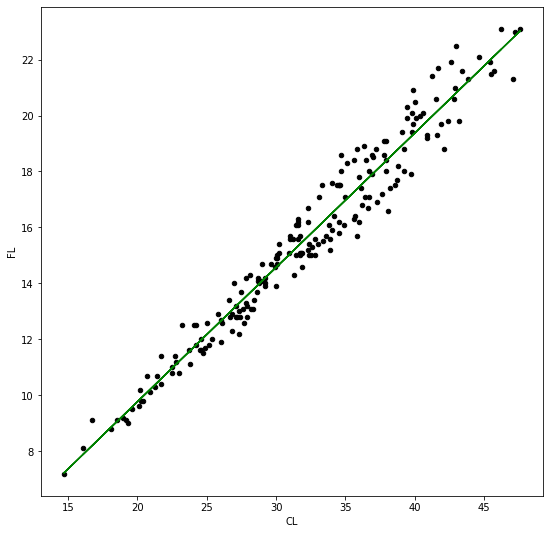

In [ ]:
data.plot(kind='scatter',x='CL',y='FL',figsize=(9,9),color='black')
plt.plot(data['CL'],y_pred, color='green')

In [ ]:
model=linear_model.LinearRegression()
X = pd.DataFrame([data['CL'], data['FL']**2]).T #Chuyển hàng thành cột
model.fit(X, y = data['FL'])
print('Intercept của mô hình:', model.intercept_)
print('Coefficient của mô hình:', model.coef_)
print('Độ chính xác của mô hình:', model.score(X,y=data['FL'] ))

Intercept của mô hình: 5.025965005569605
Coefficient của mô hình: [0.15600651 0.02175949]
Độ chính xác của mô hình: 0.9900013562288668


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


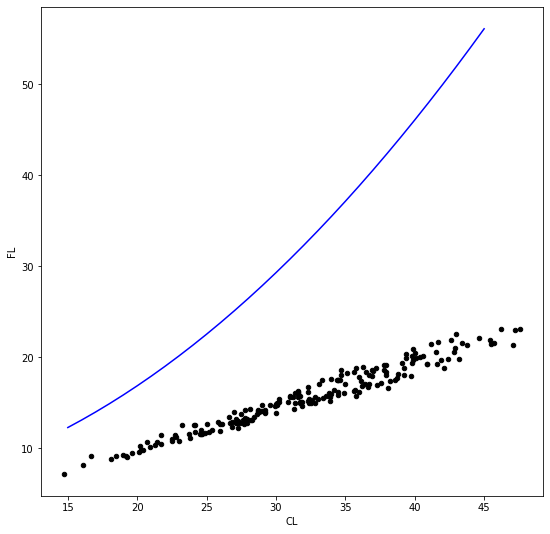

In [ ]:
import numpy as np
range = np.arange(15,46,1)
X_range = pd.DataFrame([range,range**2]).T
y_pred = model.predict(X=X_range)
data.plot(kind='scatter',x='CL',y='FL',figsize=(9,9),color='black')
plt.plot(range,y_pred,color='blue')

Intercept của mô hình: 0.12767116273190204
Coefficient của mô hình: [ 1.64226028e-06  3.27836683e-05  3.30167474e-04  1.82115752e-03
 -2.79990163e-04  1.84205029e-05 -6.54973786e-07  1.31592510e-08
 -1.40933839e-10  6.26751838e-13]
Độ chính xác của mô hình: 0.9587542783750831


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


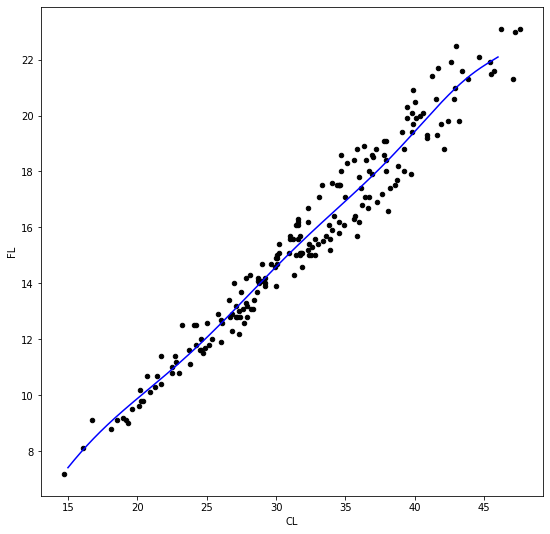

In [10]:
model=linear_model.LinearRegression()
X = pd.DataFrame([data['CL'], data['CL']**2, data['CL']**3, data['CL']**4,data['CL']**5,data['CL']**6,data['CL']**7,data['CL']**8,data['CL']**9,data['CL']**10]).T
model.fit(X, y = data['FL'])
print('Intercept của mô hình:', model.intercept_)
print('Coefficient của mô hình:', model.coef_)
print('Độ chính xác của mô hình:', model.score(X,y=data['FL'] ))
import numpy as np
range = np.arange(15,46,0.01)
X_range = pd.DataFrame([range,range**2,range**3,range**4,range**5,range**6,range**7,range**8,range**9,range**10]).T
y_pred = model.predict(X= X_range)
data.plot(kind='scatter',x='CL',y='FL',figsize=(9,9),color='black')
plt.plot(range,y_pred,color='blue')